![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# load the data
df = pd.read_csv('../../data/kc_house_data.csv')

# take a look
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [23]:
# create df of predictors, X, and our target, y
X = df.drop('price', axis=1)
y = df['price']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

In [24]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
train_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6465,4139480190,9/16/2014,3,3.25,3780,10623,1.0,NO,FAIR,Average,...,2650,1130.0,1999,0.0,98006,47.5506,-122.101,3850,11170,1150000.0
10332,1172000135,7/31/2014,4,2.00,1940,6350,1.0,NO,NONE,Good,...,970,970.0,1951,NaN,98103,47.6948,-122.357,960,6350,446000.0
17878,7454001210,6/3/2014,3,1.00,1040,6860,2.0,NO,NONE,Average,...,1040,0.0,1942,NaN,98146,47.5121,-122.375,1030,6512,239000.0
18830,686530530,8/4/2014,5,1.75,2510,9750,1.5,NO,NONE,Average,...,2510,0.0,1969,NaN,98052,47.6635,-122.149,1900,9750,570000.0
12147,5095401360,11/21/2014,3,2.50,2080,16050,1.0,NO,NONE,Very Good,...,1360,720.0,1978,0.0,98059,47.4694,-122.069,1790,14550,418000.0


In [65]:
train_df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.619700e+04,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,13312.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,1.619700e+04
mean,4.574580e+09,3.375502,2.117645,2082.103229,1.501166e+04,1.494166,1793.205779,1970.974625,84.279597,98077.818114,47.560210,-122.213990,1988.743348,12869.369883,5.414816e+05
std,2.869750e+09,0.921941,0.769608,920.166475,3.895139e+04,0.537562,830.940139,29.323161,401.456492,53.564139,0.138662,0.140042,688.273221,28070.766410,3.671641e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,8.100000e+04
25%,2.125059e+09,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,1200.000000,1951.000000,0.000000,98033.000000,47.470200,-122.327000,1490.000000,5100.000000,3.220000e+05
50%,3.904910e+09,3.000000,2.250000,1910.000000,7.632000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.572100,-122.231000,1840.000000,7634.000000,4.500000e+05
75%,7.305300e+09,4.000000,2.500000,2550.000000,1.064800e+04,2.000000,2220.000000,1997.000000,0.000000,98118.000000,47.678000,-122.124000,2370.000000,10050.000000,6.450000e+05
max,9.842301e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.316000,6210.000000,871200.000000,7.060000e+06


<AxesSubplot:>

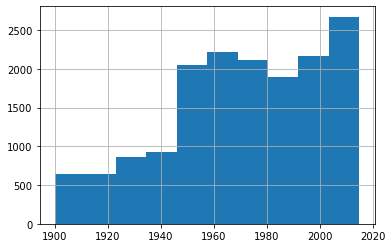

In [66]:
train_df['yr_built'].hist()

In [25]:
train_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.700481
sqft_above       0.602156
sqft_living15    0.586176
bathrooms        0.526186
lat              0.307136
bedrooms         0.302600
floors           0.257098
yr_renovated     0.134394
sqft_lot         0.092576
sqft_lot15       0.082877
yr_built         0.053602
long             0.022320
id              -0.017423
zipcode         -0.050696
Name: price, dtype: float64

In [26]:
simple_model_X_train = X_train[['sqft_living', 'sqft_living15', 'sqft_above',
                   'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_lot15']]

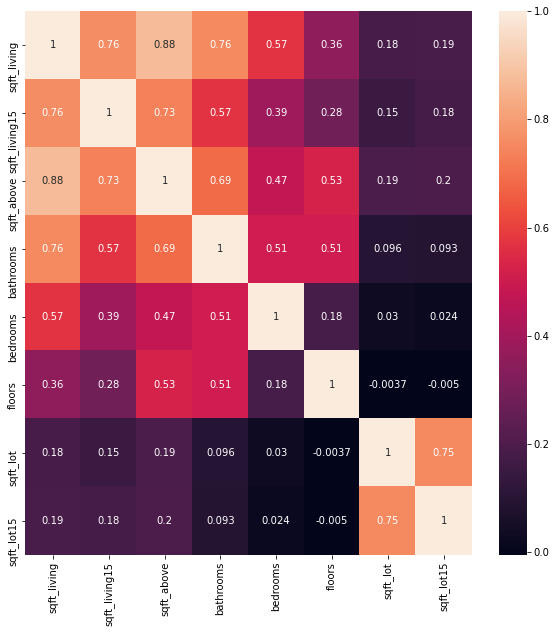

In [27]:
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(simple_model_X_train.corr(), annot=True);

In [28]:
simple_model_X_train.shape

(16197, 8)

In [29]:
y_train.shape

(16197,)

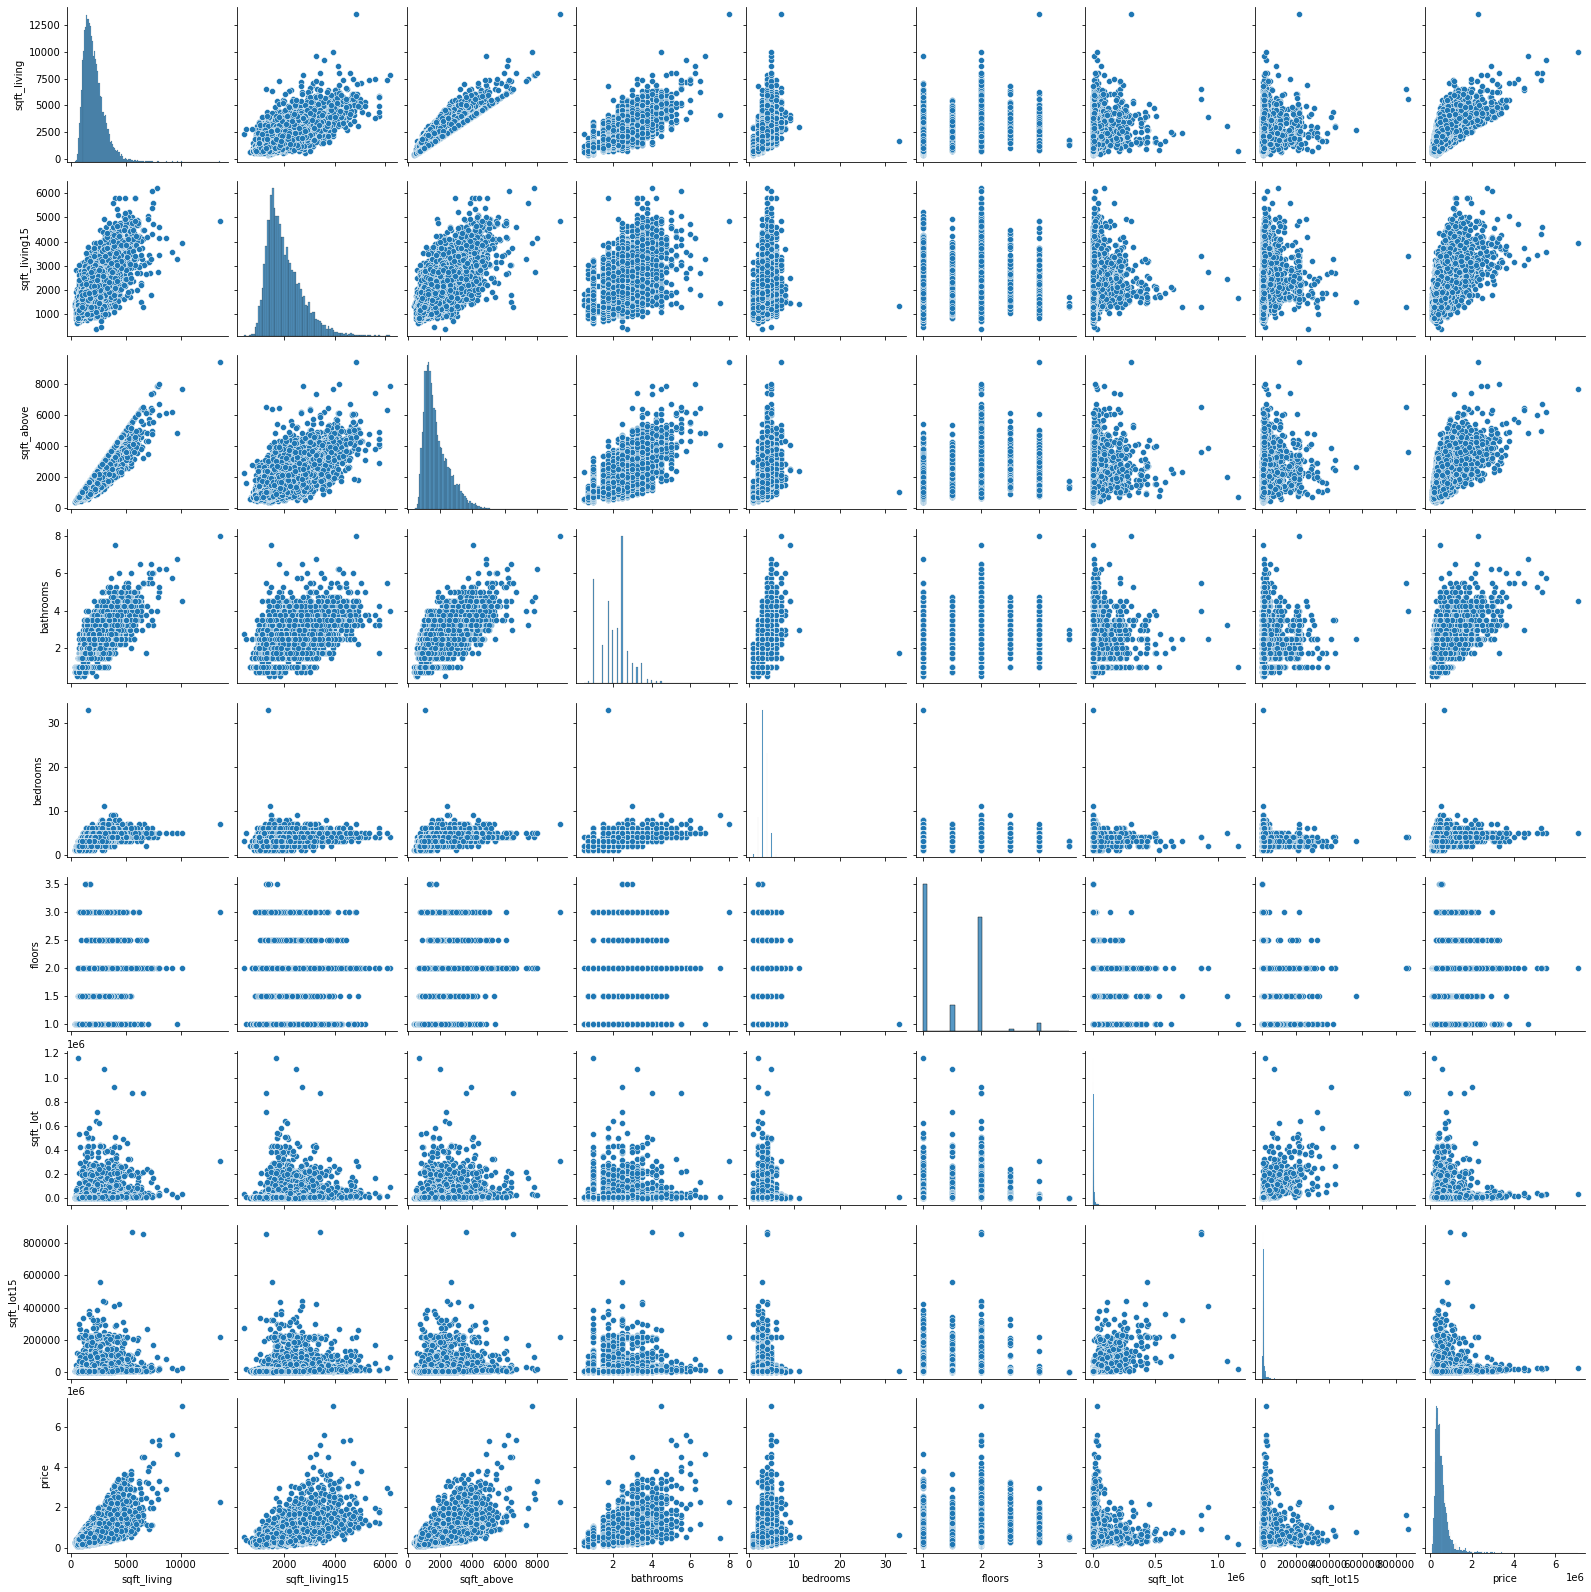

In [30]:
# make simple model df
simple_model_df = pd.concat([simple_model_X_train, y_train], axis=1)

# look at scatter plots and histograms
sns.pairplot(simple_model_df);

### Feature Selection

- Use `sqft_living` and not `sqft_above` because `sqft_living` includes the size of the basement in addition to the information in `sqft_above`. The correlation between the two is 0.88, so we'll use only one to avoid a collinearity issue.
- Use both `sqft_living` and `sqft_living15`, as well as `sqft_lot` and `sqft_lot15`. These two sets of features are correlated with each other at a 0.76 and 0.75, respectively. This multicollinearity is a violation of the assumptions of linear regression, but we want to include these neighbor features for our baseline model out of curiosity.
- Use `bathrooms` even though its correlation with `sqft_living` is 0.76. It has a 0.53 correlation with price, so we want to include it in our baseline model.

In [31]:
# select the features for modeling our simple baseline
simple_model_X_train = simple_model_X_train.drop('sqft_above', axis=1)
simple_model_X_train.head()

,sqft_living,sqft_living15,bathrooms,bedrooms,floors,sqft_lot,sqft_lot15
6465,3780,3850,3.25,3,1.0,10623,11170
10332,1940,960,2.00,4,1.0,6350,6350
17878,1040,1030,1.00,3,2.0,6860,6512
18830,2510,1900,1.75,5,1.5,9750,9750
12147,2080,1790,2.50,3,1.0,16050,14550


In [42]:
# scale the features
scaler = StandardScaler()
scaler.fit(simple_model_X_train)
simple_model_X_train_scaled = scaler.transform(simple_model_X_train)

simple_model_X_train_scaled = pd.DataFrame(simple_model_X_train_scaled,
                                           columns=simple_model_X_train.columns,
                                           index=simple_model_X_train.index)
simple_model_X_train_scaled.head()

,sqft_living,sqft_living15,bathrooms,bedrooms,floors,sqft_lot,sqft_lot15
6465,1.845263,2.704324,1.471386,-0.407307,-0.919301,-0.112674,-0.060541
10332,-0.154437,-1.494719,-0.152869,0.677394,-0.919301,-0.222378,-0.232255
17878,-1.132551,-1.393012,-1.452272,-0.407307,0.941008,-0.209284,-0.226484
18830,0.465035,-0.128940,-0.477719,1.762096,0.010854,-0.135087,-0.111129
12147,-0.002286,-0.288765,0.496833,-0.407307,-0.919301,0.026658,0.059873


In [43]:
simple_model_sm = sm.OLS(endog=y_train, exog=sm.add_constant(simple_model_X_train_scaled)).fit()
simple_model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2447.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:00:07   Log-Likelihood:            -2.2468e+05
No. Observations:               16197   AIC:                         4.494e+05
Df Residuals:                   16189   BIC:                         4.494e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.415e+05   2011.497    269.193      0.000    5.38e+05    5.45e+05
sqft_living     2.56e+05   4132.229     61.941      0.000    2.48e+05    2.64e+05
sqft_living15  4.302e+04   3117.123     13.800      0.000    3.69e+04    4.91e+04
bathrooms      6471.3034   3380.920      1.914      0.056    -155.673    1.31e+04
bedrooms      -5.346e+04   2505.201    -21.339      0.000   -5.84e+04   -4.85e+04
floors        -3681.4661   2353.968     -1.564      0.118   -8295.503     932.570
sqft_lot       -267.4007   3077.447     -0.087      0.931   -6299.537    5764.736
sqft_lot15    -2.435e+04   3087.493     -7.885      0.000   -3.04e+04   -1.83e+04
==============================================================================
Omnibus:                    10681.322   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325280.595
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      24.269   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
sqft_lot_sm = sm.OLS(endog=y_train, exog=sm.add_constant(simple_model_X_train_scaled['sqft_living'])).fit()
sqft_lot_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.560e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:17:06   Log-Likelihood:            -2.2506e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.415e+05   2058.990    262.984      0.000    5.37e+05    5.46e+05
sqft_living  2.572e+05   2058.990    124.908      0.000    2.53e+05    2.61e+05
==============================================================================
Omnibus:                    10616.296   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           307216.140
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      23.634   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
simple_lm = LinearRegression()
simple_lm.fit(simple_model_X_train_scaled[['sqft_living']], y_train)

simple_model_X_test = X_test[['sqft_living', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_lot15']]
simple_model_X_test_scaled = scaler.transform(simple_model_X_test)
simple_model_X_test_scaled = pd.DataFrame(simple_model_X_test_scaled,
                                          columns=simple_model_X_test.columns,
                                          index=simple_model_X_test.index)
simple_model_X_test_scaled.head()

,sqft_living,sqft_living15,bathrooms,bedrooms,floors,sqft_lot,sqft_lot15
3879,-0.447871,-0.681064,0.821684,-0.407307,2.801318,-0.350747,-0.287474
12341,-1.110815,-0.622945,-0.802570,-0.407307,-0.919301,-0.206871,-0.210737
5329,0.084658,-1.218657,-1.452272,-1.492009,-0.919301,-0.329130,-0.381810
19235,-0.784777,-0.550298,-0.477719,-0.407307,-0.919301,0.005092,-0.180598
14722,-0.567418,-1.436601,-0.477719,-1.492009,0.941008,0.737772,0.417979


In [64]:
y_preds = simple_lm.predict(simple_model_X_test_scaled[['sqft_living']])
metrics.r2_score(y_test, y_preds)

0.4985792385486707

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
